# **IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline
import cufflinks as cf
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected= True)
cf.go_offline()
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
import pandas as pd
df= pd.read_csv('/Users/anupamsurkar/Desktop/Datasets/zomato.csv')

In [3]:
print("dataset contains {} rows and {} columns ".format(df.shape[0], df.shape[1]))

dataset contains 51717 rows and 17 columns 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

**SHOWING SNIPPET OF THE DATASET**

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


INFO ABOUT ALL COLUMNS:
    
url contains the url of the restaurant in the zomato website

address contains the address of the restaurant in Bengaluru

name contains the name of the restaurant

online_order whether online ordering is available in the restaurant or not

book_table table book option available or not

rate contains the overall rating of the restaurant out of 5

votes contains total number of rating for the restaurant as of the above mentioned date

phone contains the phone number of the restaurant

location contains the neighborhood in which the restaurant is located

rest_type restaurant type

dish_liked dishes people liked in the restaurant

cuisines food styles, separated by comma

approx_cost(for two people) contains the approximate cost for meal for two people

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed

# EXPLORATORY DATA ANALYSIS:-

## Which are the top restaurant chains in Bangalore? 

Text(0, 0.5, 'Name of Restaurants')

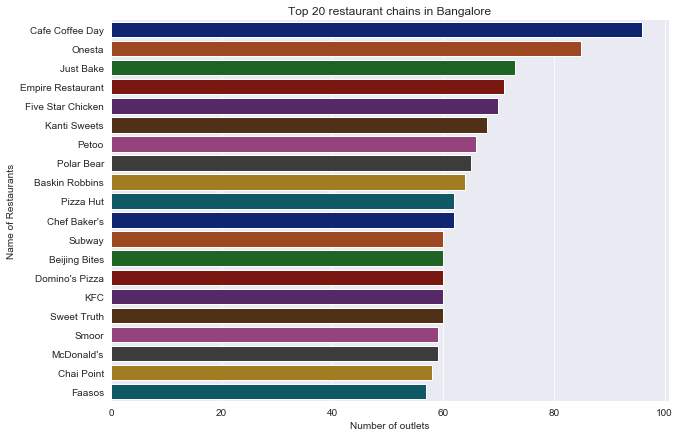

In [6]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
chains= df['name'].value_counts()[:20]
#online= df['']
sns.barplot(x= chains, y = chains.index, palette= 'dark')
sns.despine()
plt.title('Top 20 restaurant chains in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Name of Restaurants')

WE OBSERVE THE FOLLOWING:
1. Cafee Cofee Day has the most number of outlets in the city of Bangalore. 
2. McDonald's is on the 17th number according to number of outlets.

## RESTAURANTS ACCEPTING vs NOT ACCEPTING ONLINE ORDERS IN BANGALORE

In [7]:
x= df['online_order'].value_counts()

pieplot= go.Pie(labels= x.index, values= x)
layout= go.Layout(title='ACCEPTING ONLINE ORDERS IN BANGALORE', width= 500, height= 400)
fig= go.Figure(data= [pieplot], layout= layout)
py.iplot(fig, filename='pieplot')


## RESTAURANTS PROVIDING ONLINE TABLE BOOKING

In [8]:
y= df['book_table'].value_counts()
pieplot= go.Pie(labels= y.index, values= y)
layout=go.Layout(title= 'Table Booking', width= 500, height= 400)
fig= go.Figure(data= [pieplot],layout= layout)
py.iplot(fig)


## MOST COMMON RESTAURANT TYPES IN BANGALORE

Text(0, 0.5, 'Restaurant type')

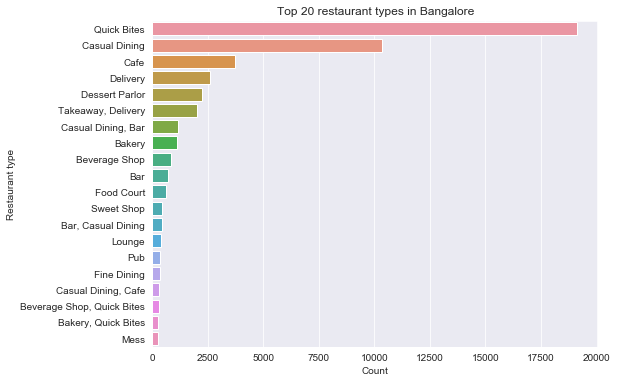

In [9]:
rest_type= df['rest_type'].value_counts()[:20]
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.barplot(x= rest_type, y = rest_type.index)
plt.title('Top 20 restaurant types in Bangalore')
plt.xlabel('Count')
plt.ylabel('Restaurant type')

WE OBSERVE THAT:
    1. BANGALORE being a busy city, most common type of restaurants are Quick Bites restaurants.
    2. Takeaway or delivery is less popular.  
    3. Fine dining is very rare. 

## RATING DISTRIBUTION

Text(0.5, 0, 'Ratings')

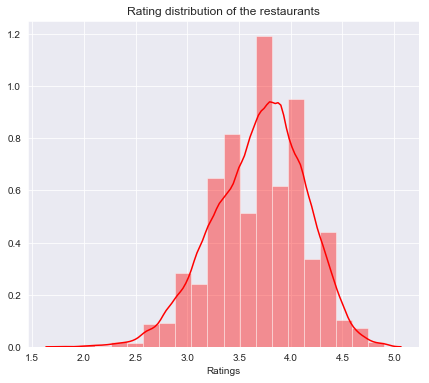

In [10]:
rating= df['rate']
rating= rating.dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.distplot(rating, bins = 20,  color= 'red')
plt.title('Rating distribution of the restaurants')
plt.xlabel('Ratings')

WE OBSERVE THAT:
    1. Maximum restaurants have ratings between 3 and 4.
    2. Restaurants with rating higher than 4.5 are very rare.

## COST DISTRIBUTION FOR TWO PEOPLE:

Text(0.5, 0, 'Cost for two people')

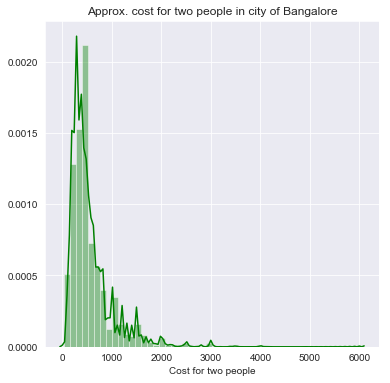

In [11]:
cost= df['approx_cost(for two people)']
cost= cost.dropna().apply(lambda x : int(x.replace(',', '')))
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.distplot(cost, color= 'green')
plt.title('Approx. cost for two people in city of Bangalore')
plt.xlabel('Cost for two people')

 WE OBSERVE THAT:
     1. Maximum restaurants in banguluru cost less than INR 1000 for two people.

## COST vs RATING

Text(0, 0.5, 'Approx. cost for 2 people')

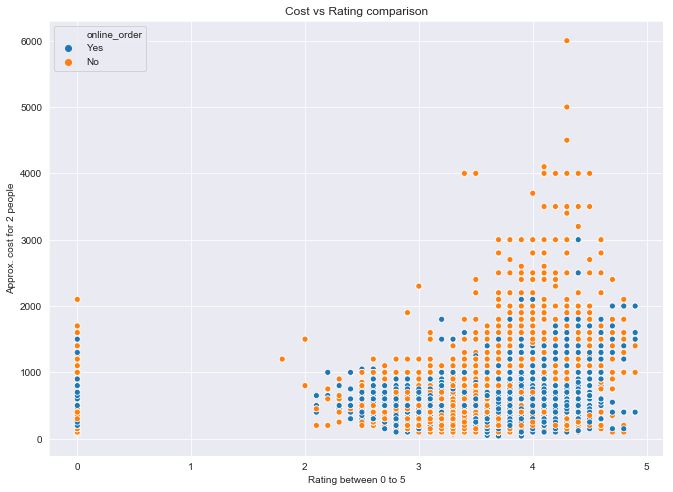

In [12]:
crdf= df[['rate', 'approx_cost(for two people)', 'online_order']].dropna()
crdf['rate']= crdf['rate'].apply(lambda x : float(x.split('/')[0]) if (len(x)>3) else 0)
crdf['approx_cost(for two people)']= crdf['approx_cost(for two people)'].apply(lambda x : int(x.replace(',', '')))
plt.figure(figsize=(11, 8))
sns.set_style('darkgrid')
sns.scatterplot( x= 'rate', y = 'approx_cost(for two people)', hue= 'online_order', data= crdf )
plt.title('Cost vs Rating comparison')
plt.xlabel('Rating between 0 to 5')
plt.ylabel('Approx. cost for 2 people')

## **VOTE DISTRIBUTION** 

In [13]:
online_yes= df[df['online_order']== 'Yes']['votes']

online_no= df[df['online_order']== 'No']['votes']
trace1= go.Box(y= online_yes, name= 'Accepting online orders')
trace2= go.Box(y= online_no, name= 'Not accepting online orders')
layout= go.Layout(title= 'Vote disrtibution', width= 800, height= 400)
data= [trace1, trace2]
fig= go.Figure(data = data, layout= layout)
py.iplot(fig)


We observe that :
    1. Restaurants accepting online orders get more umber of votes.
    2. Median number of votes are different in both categoies.

## **APPROX. COST COMPARISON:**

In [14]:
crdf= df[['approx_cost(for two people)', 'online_order']].dropna()
crdf['approx_cost(for two people)']= crdf['approx_cost(for two people)'].apply(lambda x : int(x.replace(',', '')))
crdf_yes= crdf[crdf['online_order']== 'Yes']['approx_cost(for two people)']
crdf_no= crdf[crdf['online_order']== 'No']['approx_cost(for two people)']
trace1= go.Box(y= crdf_yes, name= 'Accepting online orders')
trace2= go.Box(y= crdf_no, name= 'Not accepting online orders')
layout= go.Layout(title= 'APPROX. COST COMPARISON', width= 800, height= 500)
data= [trace1, trace2]
fig= go.Figure(data= data, layout= layout)
py.iplot(fig)

## MOST FAMOUS AREAS IN BANGALORE FOR FOOD LOVERS (FOODIE AREAS) 

Text(0, 0.5, 'Location in city')

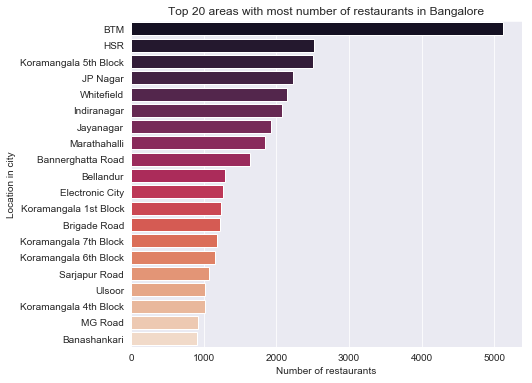

In [15]:
areas= df['location'].value_counts()[:20]

plt.figure(figsize=(7, 6))
sns.set_style('darkgrid')
sns.barplot(x= areas, y= areas.index, palette='rocket')
plt.title('Top 20 areas with most number of restaurants in Bangalore')
plt.xlabel('Number of restaurants')
plt.ylabel('Location in city')

WE OBSERVE THAT:
    1. BTM, HSR, Koramangala 5th Block has the most number of restaurants.
    2. BTM dominates by having more than 5000 restaurants.
    3. MG Road which is a very popular area in Bangalore has less than 1000 restaurants.

## MOST FAMOUS CUISINES IN BANGALORE:
    

Text(0, 0.5, 'Cuisines')

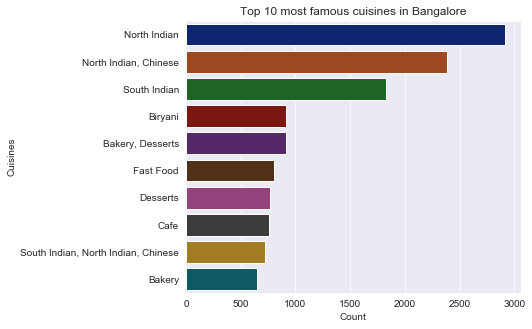

In [16]:
cuisines= df['cuisines'].value_counts()[:10]
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.barplot(x= cuisines, y= cuisines.index, palette='dark')
plt.title('Top 10 most famous cuisines in Bangalore')
plt.xlabel('Count')
plt.ylabel('Cuisines')



WE OBSERVE THAT:
    1. North Indian, South Indian, Chinese are very popular in Bangalore.
    2. Banguluru appears to be more influenced by North Indian culture.

# GEOCODING

In [17]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location, timeout= 20)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [18]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9104361, 77.4836681)"
3,Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,"(12.9068169, 77.5635247362134)"


## HEAT MAP OF ALL RESTAURANTS IN BANGALORE

In [19]:
rest_count= pd.DataFrame(df['location'].value_counts().reset_index())
rest_count.columns= ['Name', 'count']
rest_count=rest_count.merge(locations, on = "Name", how = "left" ).dropna()
rest_count.head()

,Name,count,geo_loc
0,BTM,5124,"(12.91127585, 77.6045654343118)"
1,HSR,2523,"(12.91445305, 77.6426938363703)"
2,Koramangala 5th Block,2504,"(13.2923988, 77.7519261)"
3,JP Nagar,2235,"(12.9072515, 77.5782713)"
4,Whitefield,2144,"(12.9696365, 77.7497448)"


In [20]:
maps = folium.Map(location= [12.97 , 77.59], zoom_start= 12)
folium.Marker(
location= [12.97 , 77.59], popup= 'geographical center of Bangalore', 
    icon= folium.Icon(color= 'green', icon= 'ok-sign')).add_to(maps)
lat , lon= zip(*np.array(rest_count['geo_loc']))
rest_count['lat']= lat
rest_count['lon']= lon

HeatMap(rest_count[['lat', 'lon', 'count']].values.tolist()).add_to(maps)
maps


We Observe That:
    1. Restaurants are concentrated towards the center of Bangalore.
    2. Central Bangalore is the best place for starting new restautrants.

## FINDING NORTH INDIAN RESTAURANTS IN BANGALORE

In [21]:
north_data=  pd.DataFrame(df[df['cuisines']== 'North Indian'].groupby(['location'], as_index= False)['url'].agg('count'))
north_data.columns= ['Name', 'count']
#north_data.head()
north_data = north_data.merge(locations, on = 'Name', how = 'left' ).dropna()
#north_data.head()
lat , lon= zip(*np.array(north_data['geo_loc']))
north_data['lat'] = lat
north_data['lon'] = lon
north_data.head()

,Name,count,geo_loc,lat,lon
0,BTM,340,"(12.91127585, 77.6045654343118)",12.911276,77.604565
1,Banashankari,36,"(12.9152208, 77.573598)",12.915221,77.573598
2,Banaswadi,12,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,75,"(12.887979, 77.5970812)",12.887979,77.597081
4,Basavanagudi,21,"(12.9417261, 77.5755021)",12.941726,77.575502


In [22]:
maps= folium.Map(location = [12.97 , 77.59], zoom_start= 12)
folium.Marker(
location= [12.97 , 77.59], popup= 'geographical center of Bangalore', 
    icon= folium.Icon(color= 'green', icon= 'ok-sign')).add_to(maps)
HeatMap(north_data[['lat', 'lon', 'count']].values.tolist()).add_to(maps)
maps

We observe the following:
    1. North indian restaurants are more concentrated towards south Bangalore region.

## FINDING SOUTH INDIAN RESTAURANTS IN BANGALORE

In [23]:
south_data=  pd.DataFrame(df[df['cuisines']== 'South Indian'].groupby(['location'], as_index= False)['url'].agg('count'))
south_data.columns= ['Name', 'count']
#north_data.head()
south_data = south_data.merge(locations, on = 'Name', how = 'left' ).dropna()
#north_data.head()
lat , lon= zip(*np.array(south_data['geo_loc']))
south_data['lat'] = lat
south_data['lon'] = lon
south_data.head()

,Name,count,geo_loc,lat,lon
0,BTM,113,"(12.91127585, 77.6045654343118)",12.911276,77.604565
1,Banashankari,86,"(12.9152208, 77.573598)",12.915221,77.573598
2,Banaswadi,37,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,48,"(12.887979, 77.5970812)",12.887979,77.597081
4,Basavanagudi,89,"(12.9417261, 77.5755021)",12.941726,77.575502


In [24]:
maps= folium.Map(location = [12.97 , 77.59], zoom_start= 12)
folium.Marker(
location= [12.97 , 77.59], popup= 'geographical center of Bangalore', 
    icon= folium.Icon(color= 'green', icon= 'ok-sign')).add_to(maps)
HeatMap(south_data[['lat', 'lon', 'count']].values.tolist()).add_to(maps)
maps

We observe the following:
    1. South indian restaurants are spread all over the city of Bangalore which is obvious.